In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.tabular import *
from fastai.metrics import error_rate
import pandas as pd
import numpy as np
import glob



In [3]:
data = []
for filepath in glob.iglob('data/*.csv'):
    df = pd.read_csv(filepath)
    data.append(df)
    
path = '/home/ubuntu/ChessAI/data'    
df_full = pd.concat(data)


In [4]:
n_games = df_full['game'].max()
def valid_set(x):
    perc = .2 
    val = False
    if x < 10000 : 
        val = True
    return(val)
    
df_full['is_valid'] = df_full['game'].map(valid_set)
        

    

In [6]:
df_adj = df_full[df_full['moveEnd'] < 2]

In [7]:
# prepare data for NN

procs = [FillMissing, Categorify]
cat_names = []
for i in range(65): 
    cat_names.append("X" + str(i))
cont_names=[]
pred_names = ["result"]


In [8]:
data = (TabularList.from_df(df_adj, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_from_df(col='is_valid')
                           .label_from_df(cols=pred_names, label_cls=CategoryList)
                           .databunch())

In [9]:
data.show_batch(rows =5)

X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,target
None,None,None,None,None,None,K,None,None,None,None,None,None,P,None,None,None,None,None,None,None,q,None,P,None,None,None,None,p,None,None,None,None,None,None,None,k,None,p,None,None,None,None,None,None,None,None,None,None,None,None,None,None,p,None,None,None,Q,None,None,None,None,None,None,0,Draw
None,None,None,None,r,None,K,None,None,Q,None,None,None,P,None,None,None,None,None,None,None,None,P,None,None,None,None,None,None,None,None,P,None,R,None,q,None,None,None,None,None,None,None,None,None,None,p,p,None,None,None,None,None,None,None,k,None,None,None,None,None,None,None,None,1,Black
None,None,None,None,None,R,K,None,None,P,None,None,None,P,P,None,R,None,None,None,None,None,P,None,None,None,B,n,None,B,None,None,p,None,P,None,None,None,None,None,None,None,None,None,b,None,p,None,p,None,None,None,p,p,None,p,r,None,None,r,None,None,k,None,1,Draw
None,None,None,None,R,None,K,None,None,None,None,None,None,None,None,None,None,P,None,Q,None,None,P,None,None,p,None,p,None,None,None,P,None,None,P,None,R,None,None,None,None,None,r,None,P,q,None,None,None,None,None,None,None,None,p,p,None,None,None,r,None,k,None,None,0,White
None,R,None,None,None,None,K,None,r,None,None,None,None,None,P,P,None,None,None,None,None,P,None,None,P,k,None,B,None,None,None,None,None,B,None,None,None,None,None,None,None,None,None,None,p,n,None,None,None,b,None,None,None,p,p,p,None,None,None,None,None,None,None,None,0,White


In [11]:
#learn= tabular_learner(data_for_model,  layers=[500,100,50], metrics=rmse)
learn = tabular_learner(data, layers=[256,128,64,32,16,8], ps=[0.1], emb_drop=0.1, metrics = accuracy)



In [12]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(12, 6)
    (1): Embedding(12, 6)
    (2): Embedding(12, 6)
    (3): Embedding(12, 6)
    (4): Embedding(12, 6)
    (5): Embedding(12, 6)
    (6): Embedding(12, 6)
    (7): Embedding(12, 6)
    (8): Embedding(14, 7)
    (9): Embedding(14, 7)
    (10): Embedding(14, 7)
    (11): Embedding(14, 7)
    (12): Embedding(14, 7)
    (13): Embedding(14, 7)
    (14): Embedding(14, 7)
    (15): Embedding(14, 7)
    (16): Embedding(14, 7)
    (17): Embedding(14, 7)
    (18): Embedding(14, 7)
    (19): Embedding(14, 7)
    (20): Embedding(14, 7)
    (21): Embedding(14, 7)
    (22): Embedding(14, 7)
    (23): Embedding(14, 7)
    (24): Embedding(14, 7)
    (25): Embedding(14, 7)
    (26): Embedding(14, 7)
    (27): Embedding(14, 7)
    (28): Embedding(14, 7)
    (29): Embedding(14, 7)
    (30): Embedding(14, 7)
    (31): Embedding(14, 7)
    (32): Embedding(14, 7)
    (33): Embedding(14, 7)
    (34): Embedding(14, 7)
    (35): Embedding(14, 7)


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


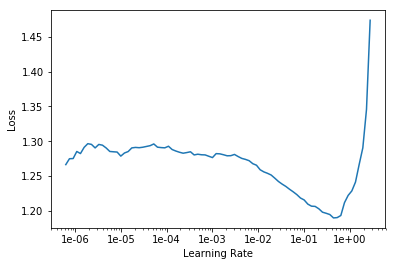

In [13]:
learn.lr_find()
learn.recorder.plot()


In [14]:
learn.fit_one_cycle(4, max_lr=1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.823468,0.865643,0.603003,00:22
1,0.781466,0.844142,0.635936,00:22
2,0.744840,0.790030,0.662462,00:22
3,0.725203,0.805077,0.666066,00:22


In [15]:
learn.save('pred_model - stage 1')

In [17]:
df_adj = df_full[df_full['moveEnd'] < 6]

In [18]:
data = (TabularList.from_df(df_adj, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_from_df(col='is_valid')
                           .label_from_df(cols=pred_names, label_cls=CategoryList)
                           .databunch())

In [21]:
learn.data = data

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


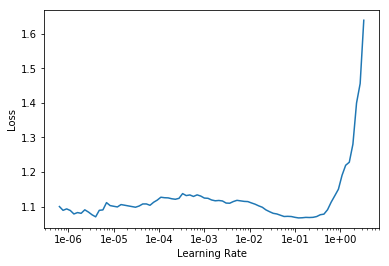

In [22]:
learn.lr_find()
learn.recorder.plot()


In [ ]:
learn.fit_one_cycle(4, max_lr=3e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.919989,0.944495,0.576096,01:52
1,0.900016,0.935383,0.594576,01:53
2,0.869119,0.915869,0.609288,01:54
